In [112]:
import sys
import os

path = os.getcwd()

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import scipy.stats
from scipy.stats import norm, ks_2samp

matplotlib.rcParams.update({'xtick.labelsize': 16})
matplotlib.rcParams.update({'ytick.labelsize': 16})

In [173]:
# Read in the csv file
df = pd.read_csv(path + '/' + 'haberman.data.csv')

In [3]:
# Understand the layout of the dataframe
# AGE   == Age of patient at time of operation
# YEAR  == Patient's year of operation (year - 1900)
# NODES == Number of positive axillary nodes detected
# STATE == Survival status,
#     1 == Patient survived 5 years or longer
#     2 == Patient died within 5 year
df.head()


,AGE,YEAR,NODES,STATE
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# Get statistics of the data set
df.describe()


,AGE,YEAR,NODES,STATE
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
# Count each state/status type
# This tells us that out of 306 patients, 225 survived 5+ years after their operations, and 81 did not
df['STATE'].value_counts()


1    225
2     81
Name: STATE, dtype: int64

In [5]:
# Split the data into two subsets
# Those who survived 5 years or longer and those who did not
df_survival_yes = df[df['STATE'] == 1]
df_survival_no = df[df['STATE'] == 2]


In [6]:
# Get statistics of the data subset
df_survival_yes.describe()


,AGE,YEAR,NODES,STATE
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [7]:
# Get statistics of the data subset
df_survival_no.describe()


,AGE,YEAR,NODES,STATE
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [8]:
# Comparing the two subsets we see:
#    The mean age and year of operation do not appear to differ significantly
#    The mean number of nodes may be significantly different between the two groups

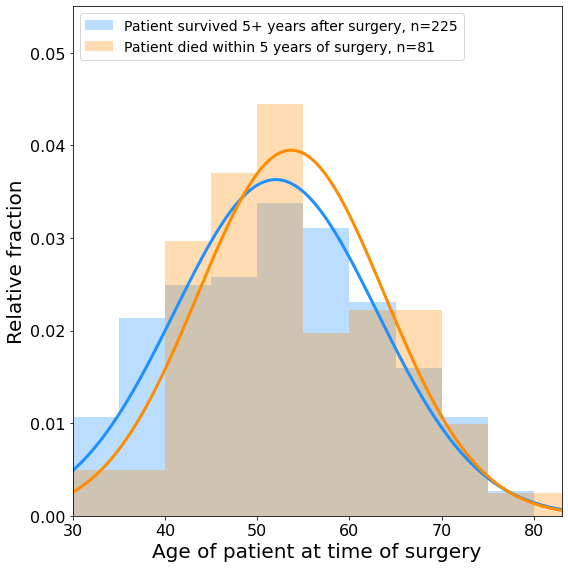

In [156]:
fig = plt.figure(figsize=(8,8))

plt.hist(df_survival_yes['AGE'], bins=np.arange(30,90,5), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='dodgerblue', 
         label='Patient survived 5+ years after surgery, n={}'.format(len(df_survival_yes)))

xmin, xmax = [30,83]
x = np.linspace(xmin, xmax, 100)

mean_yes,std_yes = norm.fit(df_survival_yes['AGE'])
y_yes = norm.pdf(x, mean_yes, std_yes)
plt.plot(x, y_yes, lw=3, color='dodgerblue')

plt.hist(df_survival_no['AGE'], bins=np.arange(30,90,5), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='darkorange', 
         label='Patient died within 5 years of surgery, n={}'.format(len(df_survival_no)))

mean_no,std_no = norm.fit(df_survival_no['AGE'])
y_no = norm.pdf(x, mean_no, std_no)
plt.plot(x, y_no, lw=3, color='darkorange')

plt.xlabel('Age of patient at time of surgery',fontsize=20)
plt.ylabel('Relative fraction',fontsize=20)
plt.legend(loc=2, fontsize=14)

plt.xlim(30,83)
plt.ylim(0.000,0.055)

plt.tight_layout()

plt.savefig(path + '/' + 'haberman_age_survival.pdf', fig=fig)


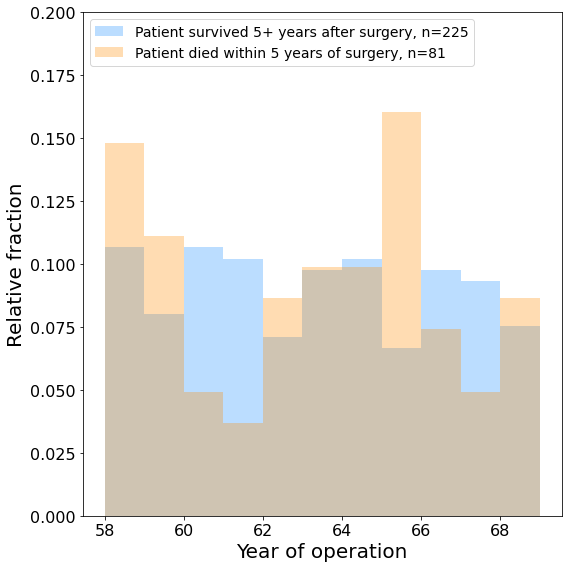

In [158]:
fig = plt.figure(figsize=(8,8))


plt.hist(df_survival_yes['YEAR'], bins=np.arange(58,70,1), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='dodgerblue', 
         label='Patient survived 5+ years after surgery, n={}'.format(len(df_survival_yes)))

plt.hist(df_survival_no['YEAR'], bins=np.arange(58,70,1), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='darkorange', 
         label='Patient died within 5 years of surgery, n={}'.format(len(df_survival_no)))

'''
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

mean_yes,std_yes = norm.fit(df_survival_yes['YEAR'])
y_yes = norm.pdf(x, mean_yes, std_yes)
plt.plot(x, y_yes, lw=3, color='dodgerblue')

mean_no,std_no = norm.fit(df_survival_no['YEAR'])
y_no = norm.pdf(x, mean_no, std_no)
plt.plot(x, y_no, lw=3, color='darkorange')
'''

plt.xlabel('Year of operation',fontsize=20)
plt.ylabel('Relative fraction',fontsize=20)
plt.legend(loc=2, fontsize=14)

plt.ylim(0.00,0.20)

plt.tight_layout()

plt.savefig(path + '/' + 'haberman_year_survival.pdf', fig=fig)


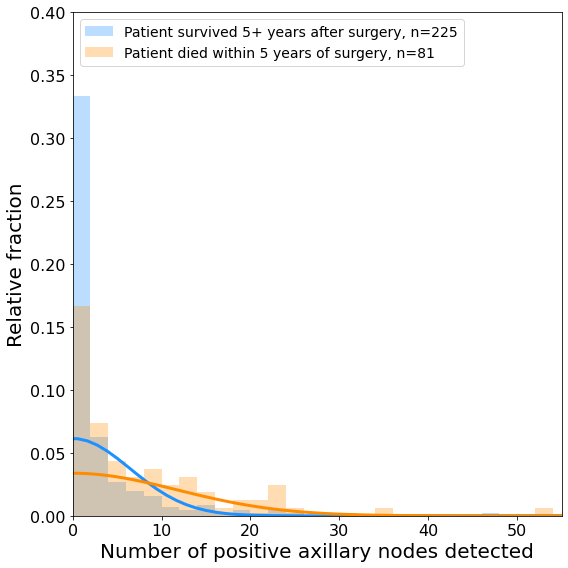

In [159]:
fig = plt.figure(figsize=(8,8))


plt.hist(df_survival_yes['NODES'], bins=np.arange(0,55,2), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='dodgerblue', 
         label='Patient survived 5+ years after surgery, n={}'.format(len(df_survival_yes)))

plt.hist(df_survival_no['NODES'], bins=np.arange(0,55,2), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='darkorange', 
         label='Patient died within 5 years of surgery, n={}'.format(len(df_survival_no)))


xmin, xmax = [-55,55]
x = np.linspace(xmin, xmax, 100)

df_nodes_gaussian_yes = []
for i,n in enumerate(df_survival_yes['NODES']):
    df_nodes_gaussian_yes.append(n)
    df_nodes_gaussian_yes.append(-1*n)

mean_yes,std_yes = norm.fit(df_nodes_gaussian_yes)
y_yes = norm.pdf(x, mean_yes, std_yes)
plt.plot(x, y_yes, lw=3, color='dodgerblue')

df_nodes_gaussian_no = []
for i,n in enumerate(df_survival_no['NODES']):
    df_nodes_gaussian_no.append(n)
    df_nodes_gaussian_no.append(-1*n)

mean_no,std_no = norm.fit(df_nodes_gaussian_no)
y_no = norm.pdf(x, mean_no, std_no)
plt.plot(x, y_no, lw=3, color='darkorange')

plt.xlabel('Number of positive axillary nodes detected',fontsize=20)
plt.ylabel('Relative fraction',fontsize=20)
plt.legend(loc=2, fontsize=14)

plt.xlim(0,55)
plt.ylim(0.00,0.40)

plt.tight_layout()

plt.savefig(path + '/' + 'haberman_nodes_survival.pdf')


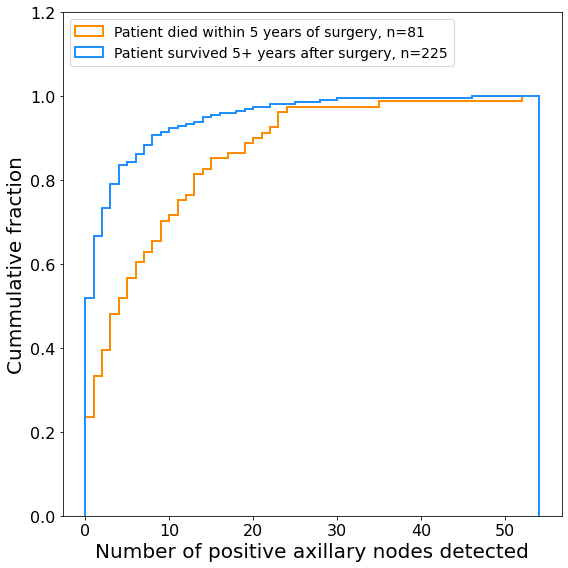

In [62]:
fig = plt.figure(figsize=(8,8))

counts_no, bin_edges_no, _ = plt.hist(df_survival_no['NODES'], bins=np.arange(0,55,1), 
         lw=2, histtype='step', density=True, cumulative=True,
         color='darkorange', 
         label='Patient died within 5 years of surgery, n={}'.format(len(df_survival_no)))
cdf_no = []
for i,c in enumerate(counts_no):
    if i == 0:
        cdf_no.append(c)
    else:
        cdf_no.append(c - counts_no[i-1])

counts_yes, bin_edges_yes, _ = plt.hist(df_survival_yes['NODES'], bins=np.arange(0,55,1), 
         lw=2, histtype='step', density=True, cumulative=True,
         color='dodgerblue', 
         label='Patient survived 5+ years after surgery, n={}'.format(len(df_survival_yes)))
cdf_yes = []
for i,c in enumerate(counts_yes):
    if i == 0:
        cdf_yes.append(c)
    else:
        cdf_yes.append(c - counts_yes[i-1])
        
plt.xlabel('Number of positive axillary nodes detected',fontsize=20)
plt.ylabel('Cummulative fraction',fontsize=20)
plt.legend(loc=2, fontsize=14)

plt.ylim(0.00,1.20)

plt.tight_layout()

plt.savefig(path + '/' + 'haberman_nodes_survival_CDF.pdf')


In [166]:
n_nodes = 4
print('{:.2f}% of patients who survived 5 years or longer after the surgery had fewer than {} nodes.'.format(counts_yes[n_nodes-1]*100.0, n_nodes))
print('But, {:.2f}% of patients who died within 5 years of the surgery ALSO had fewer than {} nodes.'.format(counts_no[n_nodes-1]*100.0, n_nodes))


79.11% of patients who survived 5 years or longer after the surgery had fewer than 4 nodes.
But, 48.15% of patients who died within 5 years of the surgery ALSO had fewer than 4 nodes.


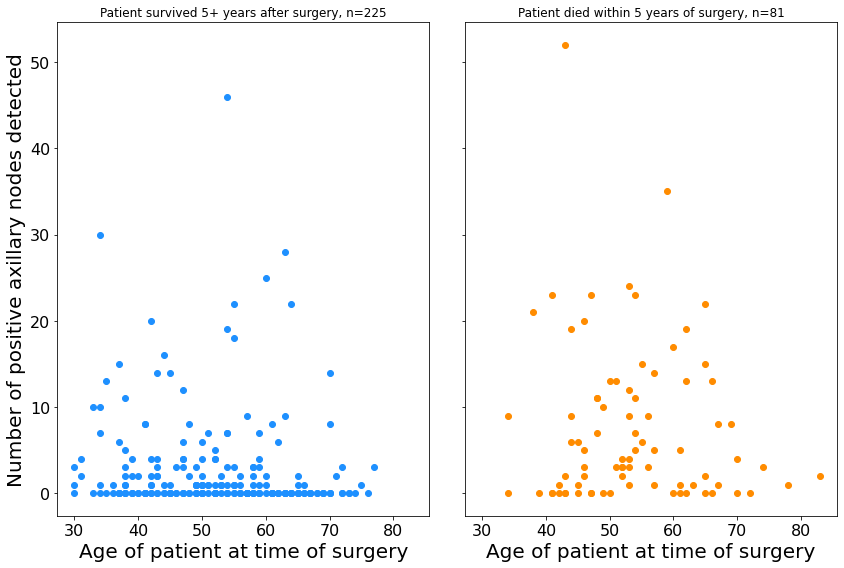

In [160]:
fig, ax = plt.subplots(1,2, figsize=(12,8), sharex=True, sharey=True)

ax[0].scatter(df_survival_yes['AGE'], df_survival_yes['NODES'], color='dodgerblue', 
              label='Patient survived 5+ years after surgery, n={}'.format(len(df_survival_yes)))
ax[1].scatter(df_survival_no['AGE'], df_survival_no['NODES'], color='darkorange', 
              label='Patient died within 5 years of surgery, n={}'.format(len(df_survival_no)))

ax[0].set_xlabel('Age of patient at time of surgery',fontsize=20)
ax[1].set_xlabel('Age of patient at time of surgery',fontsize=20)
ax[0].set_ylabel('Number of positive axillary nodes detected',fontsize=20)
ax[0].set_title('Patient survived 5+ years after surgery, n={}'.format(len(df_survival_yes)))
ax[1].set_title('Patient died within 5 years of surgery, n={}'.format(len(df_survival_no)))

plt.tight_layout()

plt.savefig(path + '/' + 'haberman_nodes_v_age_survival.pdf')


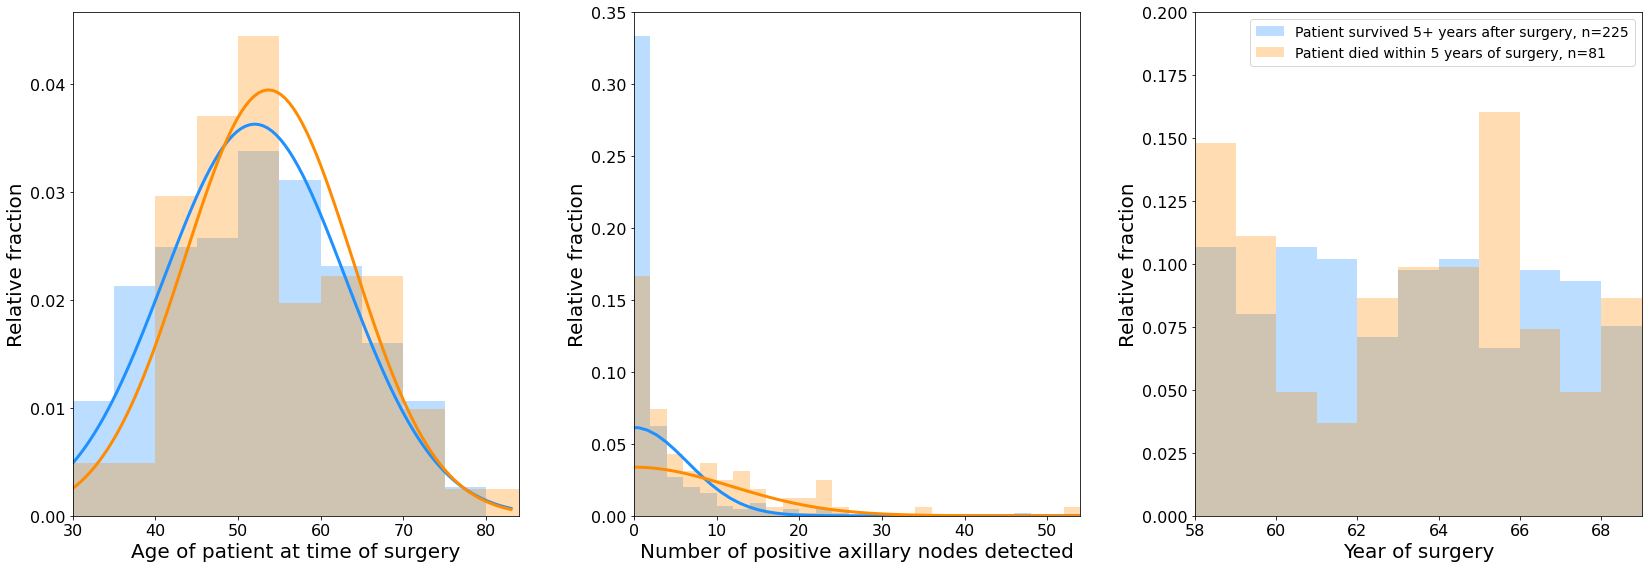

In [164]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(23,8))

ax1.hist(df_survival_yes['AGE'], bins=np.arange(30,90,5), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='dodgerblue', 
         label='Patient survived 5+ years after surgery, n={}'.format(len(df_survival_yes)))

xmin, xmax = [30,83]
x = np.linspace(xmin, xmax, 100)

mean_yes,std_yes = norm.fit(df_survival_yes['AGE'])
y_yes = norm.pdf(x, mean_yes, std_yes)
ax1.plot(x, y_yes, lw=3, color='dodgerblue')

ax1.hist(df_survival_no['AGE'], bins=np.arange(30,90,5), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='darkorange', 
         label='Patient died within 5 years of surgery, n={}'.format(len(df_survival_no)))

mean_no,std_no = norm.fit(df_survival_no['AGE'])
y_no = norm.pdf(x, mean_no, std_no)
ax1.plot(x, y_no, lw=3, color='darkorange')

ax1.set_xlabel('Age of patient at time of surgery',fontsize=20)
ax1.set_ylabel('Relative fraction',fontsize=20)

ax1.set_xlim(30,84)

ax2.hist(df_survival_yes['NODES'], bins=np.arange(0,55,2), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='dodgerblue', 
         label='Patient survived 5+ years after surgery, n={}'.format(len(df_survival_yes)))

ax2.hist(df_survival_no['NODES'], bins=np.arange(0,55,2), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='darkorange', 
         label='Patient died within 5 years of surgery, n={}'.format(len(df_survival_no)))

xmin, xmax = [-55,55]
x = np.linspace(xmin, xmax, 100)

df_nodes_gaussian_yes = []
for i,n in enumerate(df_survival_yes['NODES']):
    df_nodes_gaussian_yes.append(n)
    df_nodes_gaussian_yes.append(-1*n)

mean_yes,std_yes = norm.fit(df_nodes_gaussian_yes)
y_yes = norm.pdf(x, mean_yes, std_yes)
ax2.plot(x, y_yes, lw=3, color='dodgerblue')

df_nodes_gaussian_no = []
for i,n in enumerate(df_survival_no['NODES']):
    df_nodes_gaussian_no.append(n)
    df_nodes_gaussian_no.append(-1*n)

mean_no,std_no = norm.fit(df_nodes_gaussian_no)
y_no = norm.pdf(x, mean_no, std_no)
ax2.plot(x, y_no, lw=3, color='darkorange')

ax2.set_xlabel('Number of positive axillary nodes detected',fontsize=20)
ax2.set_ylabel('Relative fraction',fontsize=20)

ax2.set_xlim(0,54)

ax3.hist(df_survival_yes['YEAR'], bins=np.arange(58,70,1), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='dodgerblue', 
         label='Patient survived 5+ years after surgery, n={}'.format(len(df_survival_yes)))

ax3.hist(df_survival_no['YEAR'], bins=np.arange(58,70,1), 
         lw=2, histtype='stepfilled', alpha=0.3, density=True, 
         color='darkorange', 
         label='Patient died within 5 years of surgery, n={}'.format(len(df_survival_no)))

ax3.set_xlabel('Year of surgery',fontsize=20)
ax3.set_ylabel('Relative fraction',fontsize=20)

ax3.legend(loc=1, fontsize=14)

ax3.set_xlim(58,69)
ax3.set_ylim(0.00,0.20)

plt.tight_layout()

plt.savefig(path + '/' + 'haberman_survival.pdf', fig=fig)

In [167]:
ks, p = ks_2samp(df_survival_yes['AGE'], df_survival_no['AGE'])
print('KS two-samples test on age: ', ks, p)                 


KS two-samples test on age:  0.12444444444444444 0.2873828132764721


In [168]:
ks, p = ks_2samp(df_survival_yes['NODES'], df_survival_no['NODES'],
                 alternative='greater')
print('KS two-samples test on number of nodes: ', ks, p)


KS two-samples test on number of nodes:  0.33827160493827163 7.31011613007603e-07


In [169]:
ks, p = ks_2samp(df_survival_yes['YEAR'], df_survival_no['YEAR'])
print('KS two-samples test on year of operation: ', ks, p)


KS two-samples test on year of operation:  0.0725925925925926 0.885895386162465


In [259]:
idx = list(np.arange(0,len(df)+1,1))

s = random.sample(idx,5)

print(df.iloc[s[0]])
print(df.iloc[s[1]])
print(df.iloc[s[2]])
print(df.iloc[s[3]])
print(df.iloc[s[4]])


AGE      66
YEAR     58
NODES     0
STATE     1
Name: 270, dtype: int64
AGE      52
YEAR     69
NODES     3
STATE     2
Name: 142, dtype: int64
AGE      36
YEAR     60
NODES     1
STATE     1
Name: 16, dtype: int64
AGE      38
YEAR     60
NODES     0
STATE     1
Name: 27, dtype: int64
AGE      53
YEAR     59
NODES     3
STATE     2
Name: 158, dtype: int64
